### Oppgave 3d: Implementere Eulers metode

Løs Lane-Emden numerisk for n = 1, og sammenlign med den analytiske løsningen.

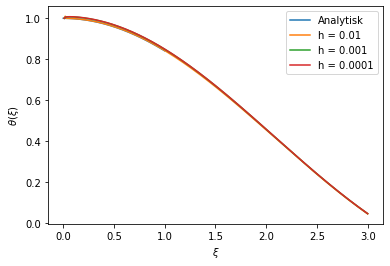

In [108]:
import numpy as np
import matplotlib.pyplot as plt

def step_euler(y,t, h, f, n):
    ''' Performs one step of Euler's method. '''
    return y + h*f(y,t, n)

def full_euler(h, f, n, y_0 = 1, start_t = 0.01, end_t = 3):
    ''' Performs all steps in Euler's method'''
    N = int((end_t - start_t)/h) 
    t_list = np.linspace(start_t, end_t, N+1) #Dette blir ikke riktig, fordi man skal printe ut ksi_N senere, og den avgjøres kun av end_t her!
    y_list = np.zeros((N+1,2))
    t_list[0] = start_t
    y_list[0] = y_0
    for i in range(N):
        next_value = step_euler(y_list[i], t_list[i], h, f, n)
        if next_value[0] == 0:
            y_list[i+1] = 0;
        else: 
            y_list[i+1] = next_value
    return t_list, y_list

def lane_emden_analytical(t):
    return np.sin(t)/t

def lane_emden(y, t, n):
    return np.array([y[1], -y[0]**(n)-2*y[1]/t])

#task 3d:
h1 = 0.01
h2 = 0.001
h3 = 0.0001
n = 1
t_list1, yh1 = full_euler(h1, lane_emden, n)
t_list2, yh2 = full_euler(h2, lane_emden, n)
t_list3, yh3 = full_euler(h3, lane_emden, n)
plt.plot(t_list, lane_emden_analytical(t_list), label="Analytisk")
plt.plot(t_list1, yh1[:,0], label="h = "+str(h1))
plt.plot(t_list2, yh2[:,0], label="h = "+str(h2))
plt.plot(t_list3, yh3[:,0], label="h = "+str(h3))
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta(\xi)$')
plt.legend()
#plt.savefig("3d.pdf", bbox_inches='tight')
plt.show()

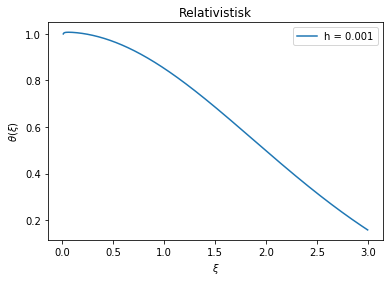

$\xi_N$ = 3.0


In [111]:
#task 3e)
#Solved in relativistic and ultra-relativistic cases!
h1 = 0.01
h2 = 0.001
h3 = 0.0001
n1 = 3/2 #relativistic
n2 = 3 #ultrarelativistic
#t_list1, yh1 = full_euler(h1, lane_emden, n2)
t_list2, yh2 = full_euler(h2, lane_emden, n1)
#t_list3, yh3 = full_euler(h3, lane_emden, n1)
#plt.plot(t_list1, yh1[:,0], label="h = "+str(h1))
plt.plot(t_list2, yh2[:,0], label="h = "+str(h2))
#plt.plot(t_list3, yh3[:,0], label="h = "+str(h3))
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta(\xi)$')
plt.title("Relativistisk")
plt.legend()
plt.savefig("3e.pdf", bbox_inches='tight')
plt.show()

print(r'$\xi_N$ =',t_list2[-1]) #Den blir alltid lik end_t slik det er nå!
